![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSSKP4m1vpP6cQpUQ3Ci8rYNQomSSN9OTPR3w&usqp=CAU)

<br>

# Ejercicio práctico
Una persona recibe su nómina **el último jueves de cada mes**. Desde el primer día que $Inditex$ cotiza en bolsa (*el 23-may-2001*), él ha decidido invertir al día siguiente de haber cobrado su nómima (o si ese día no hubo cotización, el siguiente día que la haya), la cantidad de **50€** en acciones del grupo.

La compra de las acciones la realiza al precio de **apertura de ese día de compra**. Esta persona utiliza un broker que le permite comprar acciones parciales de forma que pueda invertir siempre los 50€, pero este broker se queda en el momento de la compra con un **2%** del importe invertido.

Calcule usted el capital final obtenido si la persona realiza la venta total de sus acciones el día *28-dic-2017* al valor del cierre de la cotización.

>**NOTA:** *Descargue el histórico de cotización de acciones de ITX llamado* `stocks-ITX.csv` *para la realización de los cálculos* 

## Solución

Se va a trabajar con las librerias *Pandas, Numpy y Matplotlib*

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np

In [2]:
data = pd.read_csv('stocks-ITX.csv',sep=';')
data.head(10)

,Fecha,Cierre,Apertura
0,28-dic-2017,29.170,29.600
1,27-dic-2017,29.580,29.705
2,22-dic-2017,29.615,29.660
3,21-dic-2017,29.930,29.540
4,20-dic-2017,29.530,29.860
5,19-dic-2017,29.805,29.955
6,18-dic-2017,30.010,30.225
7,14-dic-2017,30.720,31.400
8,13-dic-2017,31.295,32.000
9,12-dic-2017,30.765,31.230


In [3]:
data.dtypes

Fecha        object
Cierre      float64
Apertura    float64
dtype: object

Averiguando si hay valores nulos

In [4]:
data.isnull().any()

Fecha       False
Cierre      False
Apertura    False
dtype: bool

*No existen valores nulos*
<br>
<br>
Invirtiendo el orden: 

In [5]:
data = data.iloc[::-1,:].reset_index(drop= True)
data.head()

,Fecha,Cierre,Apertura
0,23-may-2001,3.600,3.704
1,24-may-2001,3.608,3.600
2,25-may-2001,3.602,3.600
3,28-may-2001,3.580,3.560
4,29-may-2001,3.614,3.562


Tranformando los meses en español abreviado a números con dos dígitos para que la columna fecha sea variables *datetime*

In [6]:
meses_en_esp=['ene','feb','mar','abr','may','jun','jul','ago','set','oct','nov','dic']
for index, mes in enumerate(meses_en_esp):
    data['Fecha']=data['Fecha'].str.replace(mes,str(index+1).zfill(2),regex=False)    

In [7]:
data.head()

,Fecha,Cierre,Apertura
0,23-05-2001,3.600,3.704
1,24-05-2001,3.608,3.600
2,25-05-2001,3.602,3.600
3,28-05-2001,3.580,3.560
4,29-05-2001,3.614,3.562


In [8]:
data['Fecha']= pd.to_datetime(data['Fecha'])

In [9]:
data.dtypes

Fecha       datetime64[ns]
Cierre             float64
Apertura           float64
dtype: object

Añadiendo las columnas Mes y Año  

In [10]:
data['Dia_semana']= data['Fecha'].dt.day_name()
data['Mes']= data['Fecha'].dt.month
data['Año']= data['Fecha'].dt.year

In [11]:
data.head()

,Fecha,Cierre,Apertura,Dia_semana,Mes,Año
0,2001-05-23,3.600,3.704,Wednesday,5,2001
1,2001-05-24,3.608,3.600,Thursday,5,2001
2,2001-05-25,3.602,3.600,Friday,5,2001
3,2001-05-28,3.580,3.560,Monday,5,2001
4,2001-05-29,3.614,3.562,Tuesday,5,2001


In [12]:
data.tail()

,Fecha,Cierre,Apertura,Dia_semana,Mes,Año
4213,2017-12-20,29.530,29.860,Wednesday,12,2017
4214,2017-12-21,29.930,29.540,Thursday,12,2017
4215,2017-12-22,29.615,29.660,Friday,12,2017
4216,2017-12-27,29.580,29.705,Wednesday,12,2017
4217,2017-12-28,29.170,29.600,Thursday,12,2017


Queremos añadir una columna donde indique si en aquel día la acción **se devaluó o se revalorizó**.

Existen dos caminos:

1. El primero es usando la función `where` de $numpy$:

```python
 import numpy as np
 data['Valor_acción']= np.where(data.Cierre > data.Apertura, 'revalorizó','devaluó')

```
2. El segundo es usando la función `apply` de $pandas$ pero primero se debe definir un sub programa tal y como sigue:

In [13]:
def sentencia_accion(df):
    if df.Cierre > df.Apertura:
        sentencia = 'revalorizó'
    else:
        sentencia = 'devaluó'
    return sentencia

In [14]:
data['Valor_accion']= data.apply(sentencia_accion, axis=1)

In [15]:
data.Valor_accion.value_counts()

devaluó       2132
revalorizó    2086
Name: Valor_accion, dtype: int64

Creando la tabla **calendario** donde se muestre las fechas desde *2001-05-23* hasta *2017-12-28* con sus respectivos dias de semana, mes y año

In [16]:
fecha_ini= data.Fecha[0]
fecha_fin= data.Fecha[data.shape[0]-1]
dias= fecha_fin - fecha_ini
n_dias = dias.days + 1
Fechas=[fecha_ini] 
for i in range(1,n_dias):
    Fechas.append(Fechas[i-1]+ dt.timedelta(days=1))    

In [17]:
calendario=pd.DataFrame({'Fecha':Fechas})
calendario['Dia_semana']= calendario['Fecha'].dt.day_name()
calendario['Mes']= calendario['Fecha'].dt.month
calendario['Año']= calendario['Fecha'].dt.year

In [18]:
calendario.head()

,Fecha,Dia_semana,Mes,Año
0,2001-05-23,Wednesday,5,2001
1,2001-05-24,Thursday,5,2001
2,2001-05-25,Friday,5,2001
3,2001-05-26,Saturday,5,2001
4,2001-05-27,Sunday,5,2001


In [19]:
calendario.tail()

,Fecha,Dia_semana,Mes,Año
6059,2017-12-24,Sunday,12,2017
6060,2017-12-25,Monday,12,2017
6061,2017-12-26,Tuesday,12,2017
6062,2017-12-27,Wednesday,12,2017
6063,2017-12-28,Thursday,12,2017


Creando la tabla **Compras** que indique el número de acciones comprados en el día jueves o viernes si es el caso en cada última semana del mes.

In [20]:
#Creando el dataframe vacio
Compras={}
for attr in data.columns.to_list():
    Compras[attr]= []
Compras= pd.DataFrame(Compras)

In [21]:
mes = data.Mes.iloc[0]
filtro_dia = calendario.Dia_semana.isin(['Friday'])
for año in range(2001,2018):
    if mes == 13: mes= 1
    filtro_año= calendario.Año.isin([año])
    while mes <= 12:
        filtro_mes=calendario.Mes.isin([mes])
        dias_viernes_mes = calendario[filtro_dia & filtro_mes & filtro_año]
        supuesta_fecha_compra= dias_viernes_mes.Fecha.iloc[-1]
        try:
            datos_compra=data[data['Fecha'] == supuesta_fecha_compra]
        except:
            fecha_compra = supuesta_fecha_compra + dt.timedelta(days=1)
            datos_compra=data[data['Fecha'] == fecha_compra]
        Compras= pd.concat([Compras,datos_compra])       
        mes += 1               

In [22]:
Compras.head()

,Fecha,Cierre,Apertura,Dia_semana,Mes,Año,Valor_accion
2,2001-05-25,3.602,3.600,Friday,5.0,2001.0,revalorizó
27,2001-06-29,3.770,3.700,Friday,6.0,2001.0,revalorizó
47,2001-07-27,3.580,3.602,Friday,7.0,2001.0,devaluó
71,2001-08-31,3.850,3.760,Friday,8.0,2001.0,revalorizó
91,2001-09-28,3.700,3.562,Friday,9.0,2001.0,revalorizó


In [23]:
Compras.shape

(189, 7)

Corrigiendo Mes y Año a variables enteras

In [24]:
Compras['Mes']= Compras['Mes'].astype('int')
Compras['Año']= Compras['Año'].astype('int')

Chequeando los dias de compra

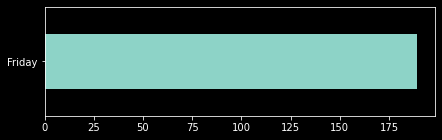

In [25]:
Compras.Dia_semana.value_counts().plot.barh(figsize=(7,2))
plt.show()

Las compras de las acciones fueron todas ellas hechas en los dias viernes.
<br>

Como último paso, calculando el número de acciones comprados con 50 euros y el total acumulado.

In [26]:
#Función auxiliar 
def comprar(coste_accion):
    n_acciones=1
    while n_acciones * coste_accion * 1.02 <=50:
          n_acciones += 1
    return n_acciones -1 

In [27]:
Compras['N_acciones'] = Compras['Apertura'].apply(comprar)

In [28]:
Compras['N_acciones_acum']=np.cumsum(Compras.N_acciones)

In [29]:
Compras.head()

,Fecha,Cierre,Apertura,Dia_semana,Mes,Año,Valor_accion,N_acciones,N_acciones_acum
2,2001-05-25,3.602,3.600,Friday,5,2001,revalorizó,13,13
27,2001-06-29,3.770,3.700,Friday,6,2001,revalorizó,13,26
47,2001-07-27,3.580,3.602,Friday,7,2001,devaluó,13,39
71,2001-08-31,3.850,3.760,Friday,8,2001,revalorizó,13,52
91,2001-09-28,3.700,3.562,Friday,9,2001,revalorizó,13,65


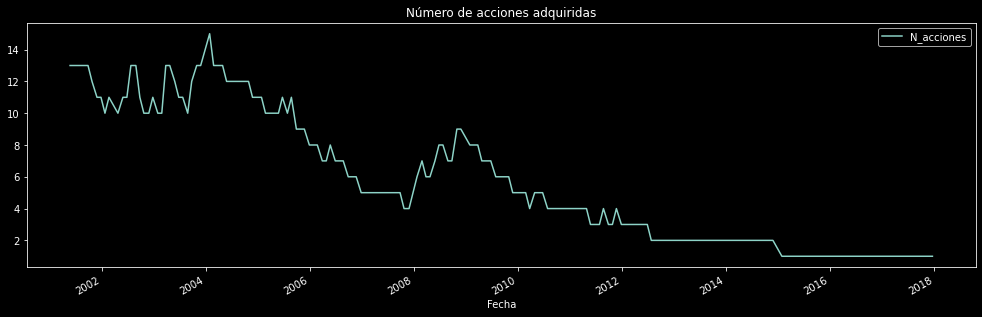

In [30]:
Compras.plot(x='Fecha',y='N_acciones',figsize=(17,5),title='Número de acciones adquiridas')
plt.show()

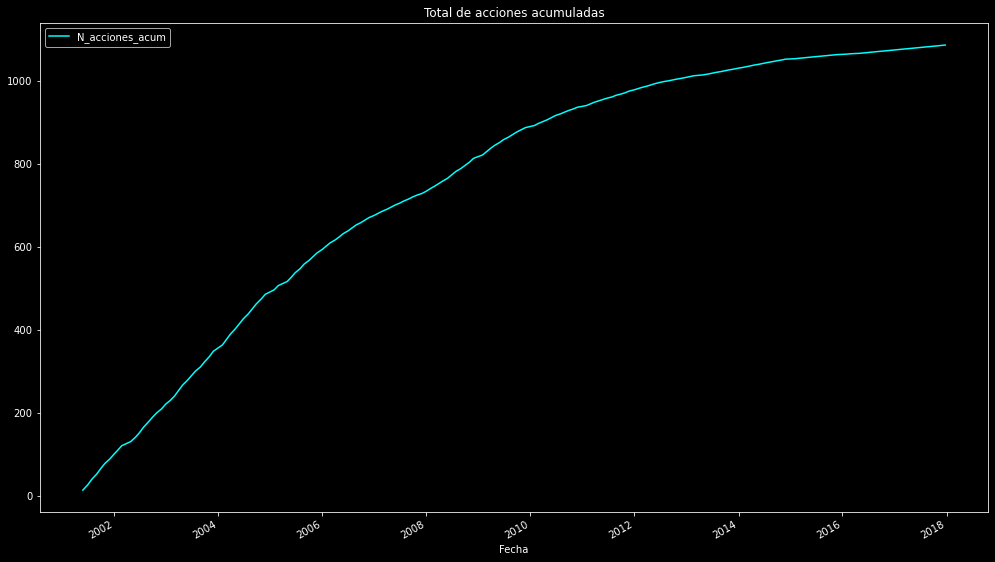

In [31]:
Compras.plot(x='Fecha',y='N_acciones_acum',figsize=(17,10),color='cyan',title='Total de acciones acumuladas')
plt.show()

Por si acaso, chequeando el valor total de acciones compradas añadiendo la columna del valor total de las acciones

In [32]:
Compras['Valor_total_comprados']=Compras['Apertura']*Compras['N_acciones']

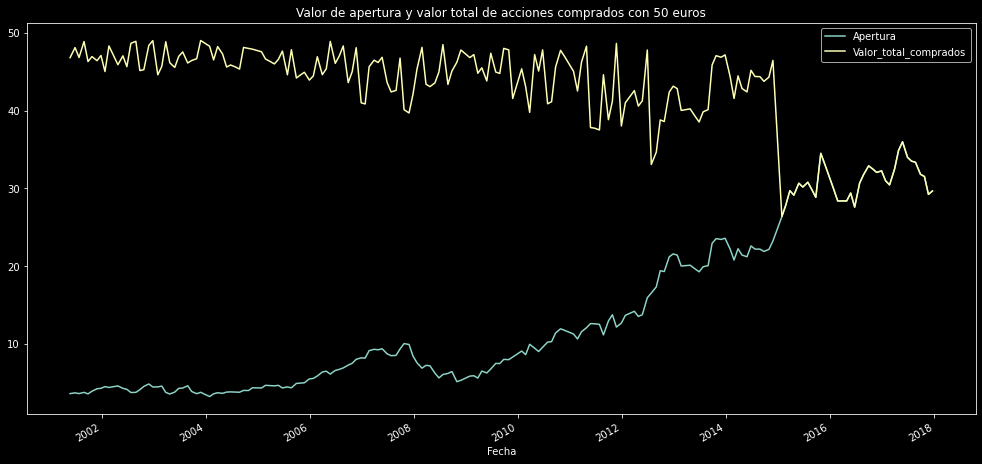

In [33]:
Compras.plot(x='Fecha',y=['Apertura','Valor_total_comprados'],
             figsize=(17,8),title='Valor de apertura y valor total de acciones comprados con 50 euros')
plt.show()

Calculando el valor total de la venta de sus acciones al día de 28 de diciembre de 2017:

In [34]:
resultado= Compras.N_acciones.sum()*data.Cierre.iloc[-1]
print('Valor total de las acciones vendidas: {0:.2f} euros'.format(resultado))

Valor total de las acciones vendidas: 31678.62 euros
